In [34]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [35]:
# Only get data analyst jobs in the US
df_DA_SA = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='South Africa')].copy()

#Drop NaN values from the 'salary_year_avg' column for accurate visualization
#df_DA_SA=df.dropna(subset=['salary_year_avg'])




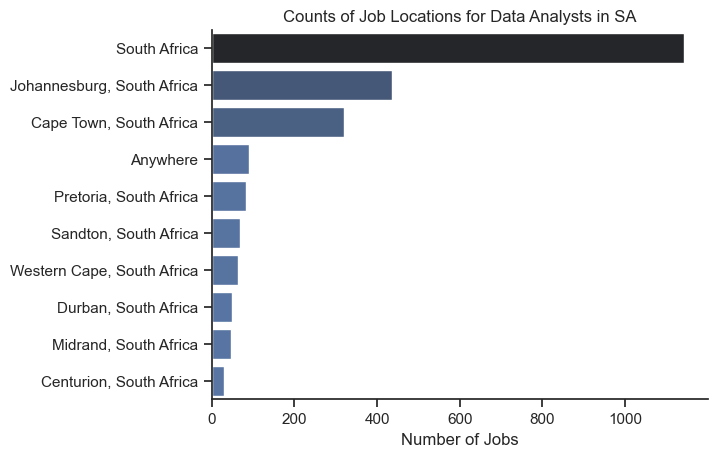

In [36]:
df_plot=df_DA_SA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysts in SA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities

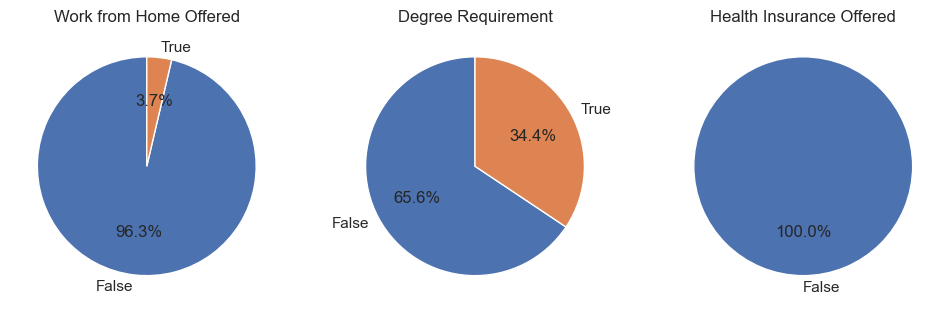

In [47]:
#Rewrite the above with a for Loop

dict_column ={
    'job_work_from_home':'Work from Home Offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

fig,ax =plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i,(column,title) in enumerate(dict_column.items()):
    values=df_DA_SA[column].value_counts()
    ax[i].pie(values,labels=values.index.astype(str),autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)

plt.show()



Top Companies for data analyst

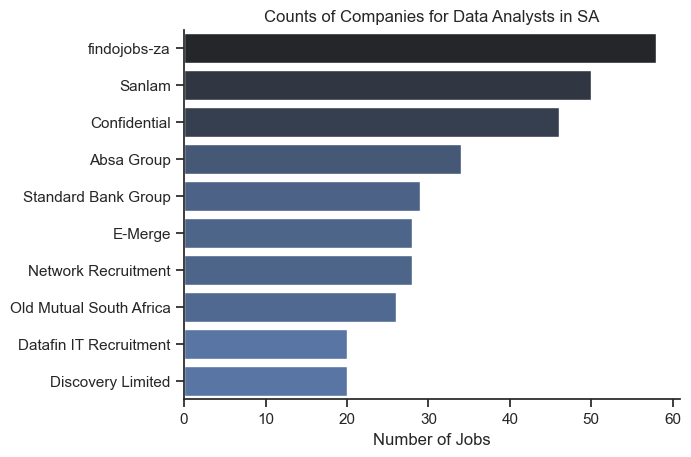

In [54]:
df_plot_1=df_DA_SA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_1,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analysts in SA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [51]:
df_DA_SA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
256,Data Analyst,Data Analyst,"Cape Town, South Africa",via Indeed,Full-time,False,South Africa,2023-09-06 13:08:51,True,False,South Africa,None,NaN,NaN,Mass Staffing Projects,[sql],{'programming': ['sql']}
563,Data Analyst,Data Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-03-22 13:37:24,False,False,South Africa,None,NaN,NaN,Futurelink Global Recruitment,"[tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
791,Data Analyst,Strategic Finance and Data Analyst,South Africa,via Pnet,Full-time,False,South Africa,2023-07-26 13:19:48,False,False,South Africa,None,NaN,NaN,Skipwaste,[power bi],{'analyst_tools': ['power bi']}
885,Data Analyst,Supervisor: Pricing/Data Analyst - Umhlanga,"uMhlanga, South Africa",via Pnet,Full-time,False,South Africa,2023-09-14 13:18:47,True,False,South Africa,None,NaN,NaN,Schlemmer & Associates Recruitment Specialists,"[sql, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
1228,Data Analyst,Data Analyst-68665,South Africa,via Pnet,Full-time,False,South Africa,2023-01-12 13:46:41,True,False,South Africa,None,NaN,NaN,Unique Personnel,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783697,Data Analyst,Business Intelligence Engineer,"Johannesburg, South Africa",via LinkedIn,Full-time,False,South Africa,2023-01-14 06:26:36,True,False,South Africa,None,NaN,NaN,(Recruiter) Ruth | Performability Recruitment,"[sql, python, c++, javascript, ssis, ssrs]","{'analyst_tools': ['ssis', 'ssrs'], 'programmi..."
784031,Data Analyst,Industrial Data,"Johannesburg, South Africa",via Trabajo.org,Full-time,False,South Africa,2023-08-01 06:59:01,False,False,South Africa,None,NaN,NaN,ALSTOM,[sap],{'analyst_tools': ['sap']}
784320,Data Analyst,Specialist: Data Analytics,"Pretoria, South Africa",via BeBee South Africa,Contractor,False,South Africa,2023-01-01 07:10:31,False,False,South Africa,None,NaN,NaN,ProDevelopment (PTY) LTD,None,None
784611,Data Analyst,Data Analyst and reporting,"Randburg, South Africa",via Trabajo.org,Full-time,False,South Africa,2023-05-07 06:31:21,True,False,South Africa,None,NaN,NaN,Isilumko Staffing,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"


C:\Users\USER\AppData\Local\Temp\ipykernel_9436\1017061368.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["total_bill"], shade=True)


<Axes: xlabel='total_bill', ylabel='Density'>

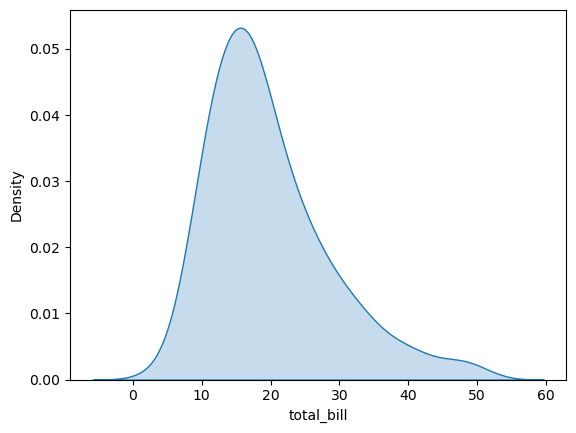

In [6]:
sns.kdeplot(df["total_bill"], shade=True)
